# **ML para Minería: Predicción de Recuperación de Oro**
### **con un modelo predictivo**

## Tabla de Contenidos

1. [Introducción](##introducción)
2. [Preparación de Datos](##preparación-de-datos)
   - [2.1 Carga y exploración inicial de datos](###2.1-carga-y-exploración-inicial-de-datos)
   - [2.2 Verificación del cálculo de recuperación](###2.2-verificación-del-cálculo-de-recuperación)
   - [2.3 Análisis de features no disponibles](###2.3-análisis-de-fetures-no-disponibles)
   - [2.4 Preprocesamiento de datos](###2.4-preprocesamiento-de-datos)
3. [Análisis Exploratorio de Datos](##análisis-exploratorio-de-datos)
   - [3.1 Evolución de concentración de metales](###3.1-evolución-de-concentración-de-metales)
   - [3.2 Comparación de distribución del tamaño de partículas](###3.2-comparación-de-distribución-del-tamaño-de-partículas)
   - [3.3 Análisis de concentraciones totales](###3.3-análisis-de-concentraciones-totales)
4. [Desarrollo y Entrenamiento del Modelo](##desarrollo-y-entrenamiento-del-modelo)
   - [4.1 Función de métrica personalizada](###4.1-función-de-métrica-personalizada)
   - [4.2 División de datos y validación cruzada](###4.2-división-de-datos-y-validación-cruzada)
   - [4.3 Entrenamiento y evaluación de modelos](###4.3-entrenamiento-y-evaluación-de-modelos)
5. [Modelo Final](##modelo-final)
6. [Conclusión](##conclusión)

## Introducción


La industria minera del oro se enfrenta constantemente al desafío de maximizar la eficiencia en la recuperación del metal precioso a partir del mineral crudo. Este proceso involucra etapas de molienda, flotación y purificación, está influenciado por una multitud de variables operativas. Pequeñas variaciones en estas variables pueden impactar significativamente en el porcentaje final de oro recuperado, representando grandes pérdidas económicas.
Zyfra, empresa desarrolladora de soluciones de eficiencia para la industria pesada, requiere un modelo predictivo que anticipe la tasa de recuperación de oro en sus procesos. La imposibilidad de predecir este resultado conlleva a operaciones subóptimas, donde se consume más energía y recursos de los necesarios, o se pierde oro potencialmente recuperable en los relaves.

El objetivo de este proyecto es desarrollar un prototipo de modelo de Machine Learning que prediga con la mayor precisión posible la cantidad de oro recuperado en las etapas rougher y final del proceso, utilizando datos históricos de parámetros de operación y mediciones de laboratorio. La finalidad del modelo es servir como base para un sistema de control que optimice la producción y elimine parámetros no rentables.

Para lograr este objetivo, el proyecto se estructurará en tres fases principales:
* La preparación y limpieza de los datos para garantizar su calidad.
* Análisis exploratorio exhaustivo para entender las relaciones entre las variables y la variable objetivo.
* Desarrollo, entrenamiento y evaluación de varios modelos de aprendizaje supervisado para seleccionar el que mejor desempeño tenga según la métrica sMAPE.

## Preparación de Datos

En esta fase se realizará la carga y limpieza inicial de los datasets para garantizar la calidad de los datos que se utilizarán en el análisis y modelado. Esto incluye verificar la integridad de los datos, calcular métricas clave para validar su consistencia, identificar características ausentes y realizar el preprocesamiento necesario.

### *2.1 Carga y exploración inicial de los datos*

In [1]:
# Visualization and analysis
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

# Data splitting and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, make_scorer

# Validation metrics
from sklearn.model_selection import cross_val_score

In [ ]:
# Load datasets
df = pd.read_csv('/datasets/.gold_recovery_full.csv')
train = pd.read_csv('/datasets/.gold_recovery_train.csv')
test = pd.read_csv('/datasets/.gold_recovery_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Rosella/Library/Mobile Documents/com~apple~CloudDocs/Python Projects/Triple Ten/ML-para-Minería/datasets/.gold_recovery_full.csv'

In [ ]:
# Data visualization
print('General information - Full dataset')
print('Dataset dimensions:', df.shape)
print('Column information:')
df.info()
print('\nData sample:')
df.head()

Información general dataset Full
Dimensiones del dataset: (22716, 87)
Información columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-nul

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print('\nInformación general dataset Train')
print('Dimensiones del dataset:', train.shape)
print('Información columnas:')
train.info()
print('\nMuestra de datos:')
train.head()


Información general dataset Train
Dimensiones del dataset: (16860, 87)
Información columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-n

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
print('\nInformación general dataset Test')
print('Dimensiones del dataset:', test.shape)
print('Información columnas:')
test.info()
print('\nMuestra de datos:')
test.head()


Información general dataset Test
Dimensiones del dataset: (5856, 53)
Información columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float6

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Tras una exploración inicial, se confirma una diferencia estructural crítica entre los conjuntos de datos: el dataset completo (full) y de entrenamiento (train) contienen 87 características, mientras que el conjunto de prueba (test) posee solo 53. Este hallazgo, que coincide con lo señalado en las instrucciones del proyecto, es fundamental y define el enfoque del modelado.

Se identificaron 3 aspectos clave que se necesitan trabajar:
1. Disponibilidad de Características: El set de prueba tiene menos columnas porque no incluye las respuestas (recovery) ni los resultados finales del proceso. Esto replica el desafío real: predecir un resultado que aún no ha ocurrido, usando solo los datos disponibles en ese momento. Por lo tanto, para que el modelo sea útil, debemos entrenarlo usando solo las 53 características que tendremos disponibles cuando hagamos predicciones nuevas.
2. Valores Ausentes: Se detecta la presencia de valores nulos en varias columnas. Será necesario realizar un análisis posterior para determinar el mecanismo detrás de estas ausencias y así seleccionar la estrategia de imputación más adecuada, como la utilización de la mediana o la media, o el uso de algoritmos más avanzados.
3. Integridad de los Datos: Se verificará la existencia de filas duplicadas. Adicionalmente, se identificó que la columna date tiene el tipo de dato object en lugar de datetime, por lo que será necesario convertirlo para garantizar el correcto ordenamiento temporal y análisis de la serie.

### *2.2 Verificación del cálculo de recuperación*

En esta etapa se realiza una validación crítica de la integridad de los datos mediante la verificación del cálculo de la variable objetivo rougher.output.recovery. El objetivo es asegurar que los valores de esta métrica clave, fundamental para el entrenamiento del modelo, sean consistentes y se hayan calculado correctamente aplicando la fórmula física del proceso de recuperación de oro.

In [ ]:
# Define necessary columns
col_concentrate = 'rougher.output.concentrate_au'
col_feed = 'rougher.input.feed_au'
col_tail = 'rougher.output.tail_au'
col_target = 'rougher.output.recovery'

# Drop missing values
data_rec_calc = train[[col_concentrate, col_feed, col_tail, col_target]].dropna()

# Data with existing calculations
existing_recovery = data_rec_calc[col_target]

# Define calculation variables
c = data_rec_calc[col_concentrate]
f = data_rec_calc[col_feed]
t = data_rec_calc[col_tail]

# Formula
calculated_recovery = (c * (f - t)) / (f * (c - t)) * 100

# Mean Absolute Error between calculation and existing values
mae = round(mean_absolute_error(existing_recovery, calculated_recovery), 4)

# Display and compare results
print('Mean Absolute Error between calculated and existing values:', mae)
print('Comparison sample:')
rec_calc_comp = pd.DataFrame({
    'Existing Recovery': existing_recovery.head(),
    'Calculated Recovery': calculated_recovery.head(),
    'Absolute Difference': np.abs(round(existing_recovery.head() - calculated_recovery.head(), 4))
})
rec_calc_comp

Eror Absoluto Medio entre el cálculo y los valores existentes: 0.0
Muestra de la compración:


,Recuperación Existente:,Recuperación Calculada:,Diferencia Absoluta:
0,87.107763,87.107763,0.0
1,86.843261,86.843261,0.0
2,86.842308,86.842308,0.0
3,87.226430,87.226430,0.0
4,86.688794,86.688794,0.0


Al realizar la verificación del cálculo de recuperación se confirma la integridad y precisión de los datos de la varibale 'rougher.output.recovery'. El Error Absoluto Medio (EAM) entre los valores existentes en el dataset y los recalculados manualmente reafirma esto al resultado ser 0.0.
Como se observa en la muestra comparativa, los valores son idénticos, sin ninguna diferencia absoluta entre ellos. Esto nos indica que la fórmula de recuperación proporcionada es la correcta y se aplicó de manera consistente en la generación del dataset. Los datos son confiables, no hay errores en el cálculo, discrepancias o inconsistencias en la variable objetivo crítica para el modelo.

Este hallazgo valida completamente la calidad de los datos en lo que respecta al cálculo central de recuperación y permite avanzar a la siguiente fase del preprocesamiento.

### *2.3 Análisis de features no disponibles*

En esta fase del proyecto se hara un analisis de las columnas ausentes en el dataset test a comparacion del dataset tain, esto es esencial porque al momento de entrenar el modelo se necesitan que ambos dataset tengan las mismas caracteristicas ya que el modelo solo podrá usar las características que estén disponibles en el momento de la predicción

In [ ]:
# Load columns from each dataset
train_cols = train.columns
test_cols = test.columns
print("Training columns:", len(train_cols))
print()
print("Test columns:", len(test_cols))

# Find missing columns in test set
missing_cols_set = set(train_cols).difference(set(test_cols))
missing_cols_list = list(missing_cols_set)

# Categorize missing columns
target_cols = []
concentrate_cols = []
tail_cols = []
calculation_cols = []
others = []
for col in missing_cols_list:
    if 'recovery' in col:
        target_cols.append(col)
    elif 'concentrate' in col:
        concentrate_cols.append(col)
    elif 'tail' in col:
        tail_cols.append(col)
    elif 'calculation' in col:
        calculation_cols.append(col)
    else:
        others.append(col)

# Display results
print(f"\nTotal missing columns in test set: {len(missing_cols_list)}")
print("\nMissing columns classification:")
print(f"Target columns: {len(target_cols)}, {target_cols}")
print(f"\nConcentrate columns: {len(concentrate_cols)}, {concentrate_cols}")
print(f"\nTail columns: {len(tail_cols)}, {tail_cols}")
print(f"\nCalculation columns: {len(calculation_cols)}, {calculation_cols}")
print(f"\nOthers: {len(others)}")

Columnas de entrenamiento: 87

Columnas de prueba: 53

Número total de columnas faltantes en test: 34

Clasificación de columnas faltantes
Columnas objetivo: 2, ['final.output.recovery', 'rougher.output.recovery']

Columnas de concetrado: 13, ['primary_cleaner.output.concentrate_pb', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'final.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_sol', 'final.output.concentrate_pb', 'rougher.calculation.sulfate_to_au_concentrate']

Columnas de colas: 16, ['final.output.tail_ag', 'final.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_ag', 'final.

El análisis estructural identifica una discrepancia fundamental entre los conjuntos de datos: el set de entrenamiento contiene 87 características mientras el de prueba solo posee 53, resultando en 34 parámetros no disponibles. Todos estos parámetros faltantes son de tipo float64 y corresponden exclusivamente a outputs del proceso de purificación. Esta categoría incluye las variables objetivo críticas (rougher.output.recovery y final.output.recovery), mediciones de concentración de metales en productos finales, mediciones en colas o relaves, y cálculos derivados de las etapas del proceso. La exclusión de estas características es conceptualmente correcta, ya que el conjunto de prueba debe simular la información disponible en tiempo real durante la operación de la planta, antes de que se conozcan los resultados finales de la recuperación y purificación del mineral.

### *2.4 Preprocesamiento de Datos*

En esta fase se aborda la preparación de los datos para el modelado, garantizando su calidad y consistencia. El proceso incluye tres etapas principales:
* Conversión de Fechas: La columna date, identificada con el tipo object, será convertida al tipo datetime para habilitar el análisis temporal y garantizar el orden cronológico correcto de los registros.
* Manejo de Valores Ausentes: Se identificarán y imputarán los valores nulos presentes en los datasets. Dada la naturaleza industrial de los datos y la posible presencia de valores atípicos, se utilizará la mediana de cada característica, calculada exclusivamente a partir del conjunto de entrenamiento, para preservar la independencia del conjunto de prueba y prevenir data leakage.
* Limpieza de Duplicados: Se realizará un análisis para detectar y eliminar registros duplicados, asegurando la integridad del dataset y evitando el sesgo en el entrenamiento del modelo.
* Alineación de Features: Finalmente, se filtrarán los conjuntos de entrenamiento y completo para conservar únicamente las 53 variables presentes en el conjunto de prueba. Esta alineación es crucial para emular las condiciones de producción, donde el modelo solo dispondrá de estas características para realizar sus predicciones.

In [ ]:
# Handle date column
df['date'] = pd.to_datetime(df['date'])
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
print(f"""Date column data type:
Full dataset: {df['date'].dtype}
Training dataset: {train['date'].dtype}
Test dataset: {test['date'].dtype}
""")

# Missing values
df_final = df.copy()
df_final = df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

train_clean = train.copy()
numeric_train = train_clean.select_dtypes(include=[np.number]).columns
for col in numeric_train:
    if train_clean[col].isnull().sum() > 0:
        median_train = train_clean[col].median()
        train_clean[col].fillna(median_train, inplace=True)
print("\nNaNs in Train after imputation:", train_clean.isna().sum().sum())

test_clean = test.copy()
for col in numeric_train:
    if col in test_clean.columns:
        if test_clean[col].isnull().sum() > 0:
            median_from_train = train[col].median()
            test_clean[col].fillna(median_from_train, inplace=True)
print("NaNs in Test after imputation:", test_clean.isna().sum().sum())

# Duplicate handling
print('\nDuplicates in full dataset:', df.duplicated().sum())
print('Duplicates in train dataset:', train_clean.duplicated().sum())
print('Duplicates in test dataset:', test_clean.duplicated().sum())

# Feature alignment
common_features = test_clean.columns.tolist()
train_target_columns = ['rougher.output.recovery', 'final.output.recovery']
train_final = train_clean[common_features + train_target_columns].copy()
print("\nFinal training set:", train_final.shape)
print("Columns:", train_final.columns.tolist())

NameError: name 'pd' is not defined

El proceso de preprocesamiento se completó exitosamente, garantizando la calidad e integridad de los datos para la fase de modelado. Se logró la estandarización del tipo de dato datetime en la columna date across todos los datasets, se eliminaron por completo los valores nulos mediante imputación robusta con la mediana, y se verificó la ausencia de registros duplicados.

La alineación de features resultó en un dataset de entrenamiento final con 55 columnas: las 53 variables predictoras presentes en el conjunto de prueba más las 2 variables objetivo (rougher.output.recovery y final.output.recovery). Esta estructura asegura que el modelo se entrene exclusivamente con las características disponibles en un entorno de producción real, mientras mantiene acceso a las métricas de recuperación necesarias para el aprendizaje supervisado. Los datos están ahora optimizados para el entrenamiento del modelo de machine learning.

## Análisis Exploratorio de Datos

En esta parte del proyecto se realizará una exploración sistemática de los datos con tres objetivos principales: 1) comprender el comportamiento de las concentraciones de metales a través de las diferentes etapas del proceso de purificación, 2) verificar la consistencia en la distribución de las características clave entre los conjuntos de entrenamiento y prueba, y 3) identificar y manejar posibles valores anómalos que podrían afectar la performance del modelo. El análisis se centrará en las variables más relevantes desde la perspectiva metalúrgica del proceso.

### *3.1 Evolución de concentración de metales*

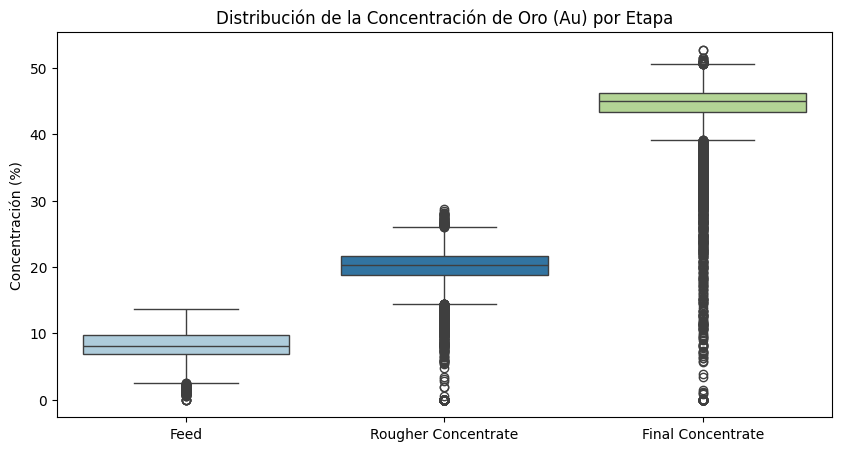

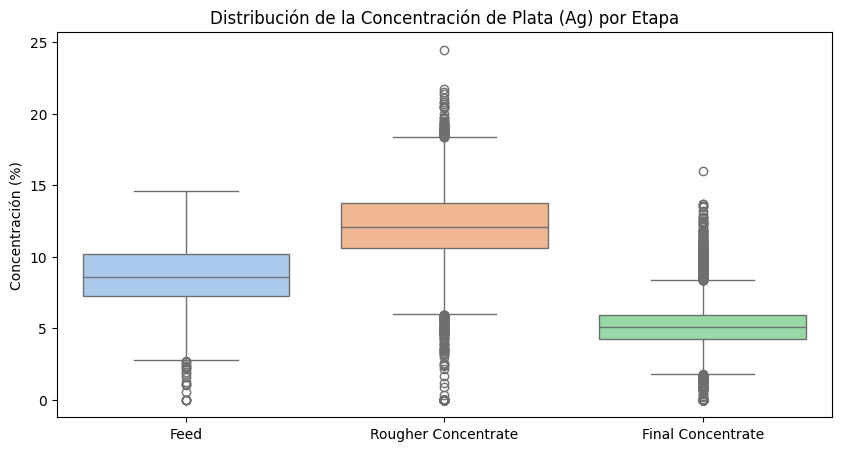

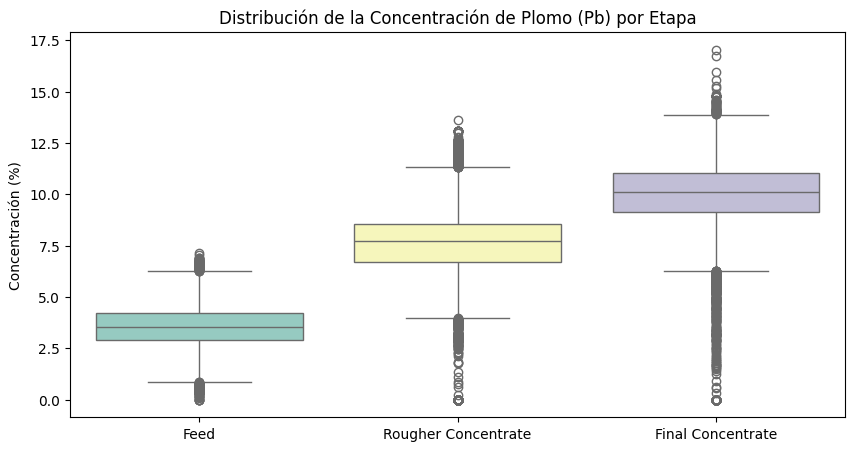

In [ ]:
# Gold boxplot
plt.figure(figsize=(10, 5))
au_data = [df_final['rougher.input.feed_au'], 
           df_final['rougher.output.concentrate_au'], 
           df_final['final.output.concentrate_au']]
sns.boxplot(data=au_data, palette='Paired')
plt.xticks([0, 1, 2], ['Feed', 'Rougher Concentrate', 'Final Concentrate'])
plt.title('Gold (Au) Concentration Distribution by Processing Stage')
plt.ylabel('Concentration (%)')
plt.show()

# Silver boxplot
plt.figure(figsize=(10, 5))
ag_data = [df_final['rougher.input.feed_ag'], 
           df_final['rougher.output.concentrate_ag'], 
           df_final['final.output.concentrate_ag']]
sns.boxplot(data=ag_data, palette='pastel')
plt.xticks([0, 1, 2], ['Feed', 'Rougher Concentrate', 'Final Concentrate'])
plt.title('Silver (Ag) Concentration Distribution by Processing Stage')
plt.ylabel('Concentration (%)')
plt.show()

# Lead boxplot
plt.figure(figsize=(10, 5))
pb_data = [df_final['rougher.input.feed_pb'].dropna(), 
           df_final['rougher.output.concentrate_pb'].dropna(), 
           df_final['final.output.concentrate_pb'].dropna()]
sns.boxplot(data=pb_data, palette="Set3")
plt.xticks([0, 1, 2], ['Feed', 'Rougher Concentrate', 'Final Concentrate'])
plt.title('Lead (Pb) Concentration Distribution by Processing Stage')
plt.ylabel('Concentration (%)')
plt.show()

Al analizar las distribuciones de los diferentes metales, se observa que en el oro hay un incremento significativo en la concentración de oro a través de las etapas del proceso. La mediana pasa de aproximadamente 7-8 ppm en la alimentación a más de 30 ppm en el concentrado final, evidenciando la efectividad del proceso de enrichment, la presencia de outliers en la etapa final sugiere ocasionales picos de alta recuperación. En la Plata como impureza principal, muestra un comportamiento opuesto al oro, su concentración disminuye notablemente desde la alimentación hasta el concentrado final, con una reducción de la mediana de aproximadamente 8 ppm a menos de 2 ppm. Esta disminución consistentemente demuestra la selectividad del proceso hacia el Oro. Por último el Plomo exhibe el patrón más claro de eliminación de impurezas, la concentración sufre una reducción drástica desde niveles cercanos a 5 ppm en la alimentación hasta valores inferiores a 1 ppm en el concentrado final. La compactación de la caja en la etapa final indica una alta eficiencia y consistencia en la remoción de este metal.

El proceso de purificación demuestra alta efectividad, la concentración de oro aumenta progresivamente mientras las impurezas (Ag y Pb) disminuyen consistentemente, confirmando la selectividad del método de extracción. Los datos validan la calidad del proceso industrial y la confiabilidad de las mediciones.

### *3.2 Comparación de distribución del tamaño de partículas*

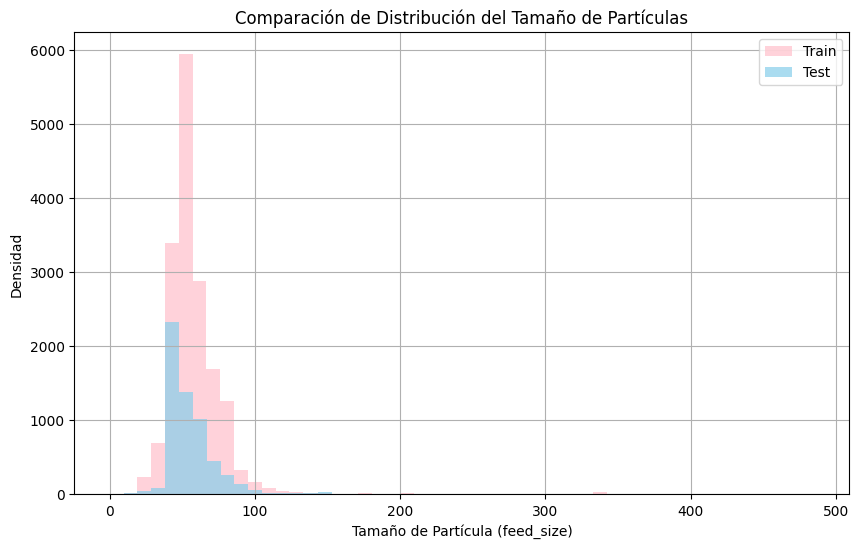

In [ ]:
# Training vs test histogram comparison
plt.figure(figsize=(10, 6))
plt.hist(train_final['rougher.input.feed_size'], bins=50, alpha=0.7, label='Train', color='pink')
plt.hist(test_clean['rougher.input.feed_size'], bins=50, alpha=0.7, label='Test', color='skyblue')
plt.title('Particle Size Distribution Comparison: Training vs Test Sets')
plt.xlabel('Particle Size (feed_size)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

El análisis comparativo de la distribución del tamaño de partículas (rougher.input.feed_size) entre los conjuntos de entrenamiento y prueba revela una concordancia sustancial en sus características fundamentales. Ambas distribuciones exhiben la misma forma unimodal con pico máximo entre los 40-60 unidades de tamaño de partícula, rango similar de valores, aproximadamente entre 0-150 unidades y comportamiento de colas comparable en ambos extremos de la distribución

La principal diferencia observada es una mayor densidad de muestras en el conjunto de entrenamiento en la región modal (40-60 unidades), lo que se manifiesta como una mayor altura en el histograma. Sin embargo, esta discrepancia no representa una diferencia estructural en la distribución, sino más bien una variación en la cantidad de muestras en el rango más común del proceso.

### *3.3 Análisis de concentraciones totales*

/var/folders/72/zcn6sk1545bf5nvyrdhzmzrh0000gp/T/ipykernel_1523/190280220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['total_feed'] = df_final[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
/var/folders/72/zcn6sk1545bf5nvyrdhzmzrh0000gp/T/ipykernel_1523/190280220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['total_rougher'] = df_final[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'roughe

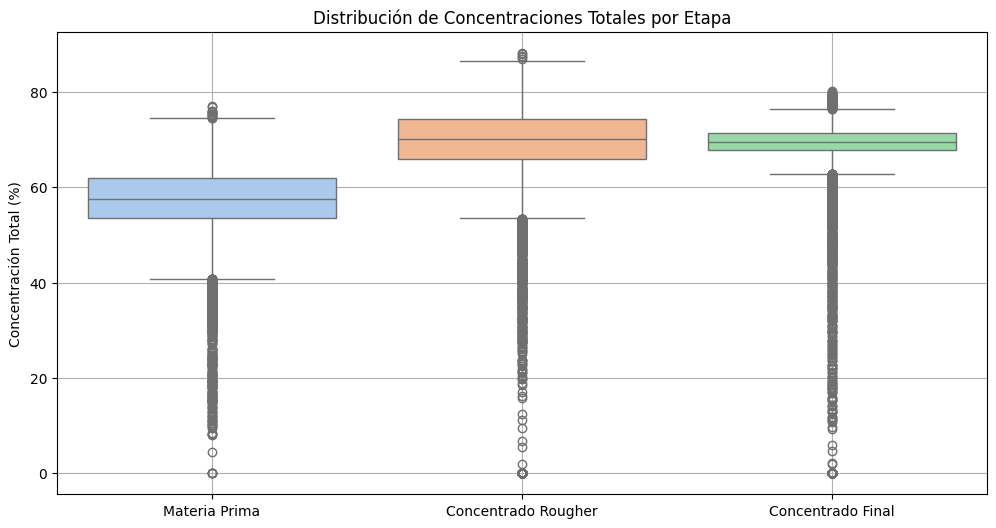

Estadisticas por Concentración
Materias Primas:
count    19439.000000
mean        57.148832
std          7.712767
min          0.040000
25%         53.507961
50%         57.577384
75%         61.951075
max         76.978947
Name: total_feed, dtype: float64

Concentrado Rougher:
count    19439.000000
mean        68.144520
std         12.540021
min          0.000000
25%         66.003784
50%         70.177013
75%         74.356904
max         88.140119
Name: total_rougher, dtype: float64

Conentrado Final:
count    19439.000000
mean        68.621192
std          7.461966
min          0.000000
25%         67.928471
50%         69.598046
75%         71.368472
max         80.210644
Name: total_final, dtype: float64


In [ ]:
# Total raw material concentration
df_final['total_feed'] = df_final[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)

# Total rougher concentrate
df_final['total_rougher'] = df_final[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)

# Total final concentrate
df_final['total_final'] = df_final[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df_final['total_feed'], 
                  df_final['total_rougher'], 
                  df_final['total_final']],
            palette="pastel")
plt.xticks([0, 1, 2], ['Raw Material', 'Rougher Concentrate', 'Final Concentrate'])
plt.title('Total Concentration Distribution by Processing Stage')
plt.ylabel('Total Concentration (%)')
plt.grid(True)
plt.show()

# Final concentration statistics
print('Concentration Statistics by Stage')
print('Raw Materials:')
print(df_final['total_feed'].describe())
print('\nRougher Concentrate:')
print(df_final['total_rougher'].describe())
print('\nFinal Concentrate:')
print(df_final['total_final'].describe())

El análisis de las concentraciones totales revela un incremento progresivo y consistente en la suma de metales a través de las etapas del proceso, pasando de 58.1% en la materia prima a 69.4% en el concentrado final. Este aumento de aproximadamente 11 puntos porcentuales confirma la efectividad del proceso de concentración, demostrando una mejora sustancial en el enrichment del mineral.

El proceso mantiene consistencia operativa, con concentraciones que se conservan dentro de rangos físicamente posibles (≤100%) y sin valores anómalos extremos que sugieran errores de medición significativos. Se identifica, sin embargo, una mayor variabilidad en la etapa rougher (desviación estándar de 12.1%), lo que indica cierta inestabilidad inherente a esta fase intermedia de concentración inicial. Esta variabilidad se reduce considerablemente en la etapa final (desviación estándar de 6.0%), evidenciando la efectividad del proceso de limpieza para estabilizar y refinar el producto.

Si bien se registran valores mínimos de 0.0% —posiblemente debido a mediciones límite o errores puntuales—, la distribución general se mantiene consistente y no se detectan valores físicamente imposibles (>100%) que justifiquen la eliminación de datos. La estabilidad del concentrado final, reflejada en un rango intercuartílico estrecho (68.4%-71.7%), valida la robustez y consistencia del proceso de purificación en su etapa terminal.

Con la integridad y calidad de los datos validadas mediante este análisis exploratorio, se procede ahora al desarrollo y entrenamiento del modelo de machine learning. Los datasets, debidamente preprocesados y analizados, están optimizados para construir un modelo predictivo robusto que aproveche las relaciones identificadas entre las variables del proceso y las métricas de recuperación de oro.

## Desarrollo y Entrenamiento del Modelo

En esta fase se implementará la métrica de evaluación sMAPE mediante una función personalizada, tal como especifican los requerimientos del proyecto. Posteriormente, se procederá al entrenamiento y evaluación comparativa de múltiples algoritmos de machine learning aplicando validación cruzada para garantizar la robustez de los resultados. El objetivo final es identificar el modelo óptimo que maximice la precisión en la predicción de la recuperación de oro en ambas etapas del proceso (rougher y final).

### *4.1 Función de métrica personalizada*

En este paso del proyecto se desarrollarán dos funciones especializadas para la evaluación del modelo.
* smape_individual: Calcula el Symmetric Mean Absolute Percentage Error (sMAPE) para una única variable objetiva. La implementación incorporará un valor épsilon (epsilon = 1e-10) para garantizar estabilidad numérica y evitar divisiones por cero, manejando efectivamente casos edge en datos industriales.
* smape_final: Combina los errores de ambas etapas del proceso (rougher y final) aplicando los pesos especificados del 25% y 75% respectivamente.

In [ ]:
# Individual sMAPE formula
def smape_individual(y_real, y_pred):
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    epsilon = 1e-10

    numerator = np.abs(y_real - y_pred)
    denominator = (np.abs(y_real) + np.abs(y_pred)) / 2 + epsilon
    return np.mean(numerator / denominator) * 100

# Final sMAPE formula
def smape_final(y_real_rougher, y_pred_rougher, y_real_final, y_pred_final):
    smape_rougher_val = smape_individual(y_real_rougher, y_pred_rougher)
    smape_final_val = smape_individual(y_real_final, y_pred_final)
    return 0.25 * smape_rougher_val + 0.75 * smape_final_val

### *4.2 División de datos y validación cruzada*

En esta fase del proyecto se llevará a cabo el desarrollo sistemático de múltiples algoritmos de machine learning con el objetivo de identificar el modelo óptimo para predecir la recuperación de oro en ambas etapas del proceso (rougher y final).
La metodología incluye:
1. Entrenamiento comparativo de diferentes familias de algoritmos (árboles de decisión, ensemble methods, modelos lineales).
2. Validación cruzada robusta para evaluar el rendimiento generalizado de cada modelo y evitar overfitting.
3. Optimización de hiperparámetros mediante búsqueda grid o randomizada para maximizar el potencial de cada algoritmo.
4. Evaluación rigurosa utilizando la métrica sMAPE personalizada, con ponderación del 25% para la etapa rougher y 75% para la etapa final.

El proceso seguirá un enfoque iterativo donde se seleccionará el mejor modelo basado en su desempeño en el conjunto de validación.

In [ ]:
# Split data into training sets for rougher and final stages
X = train_final.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_rougher = train_final['rougher.output.recovery']
y_final = train_final['final.output.recovery']

X_train, X_val, y_rougher_train, y_rougher_val = train_test_split(X, y_rougher, test_size=0.2, random_state=42, shuffle=True)
X_train, X_val, y_final_train, y_final_val = train_test_split(X, y_final, test_size=0.2, random_state=42, shuffle=True)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Verify data split
print('Total Samples:', len(train_final))
print(f'Training features: {len(X_train_scaled)} samples, 80% of data')
print(f'Validation features: {len(X_val_scaled)} samples, 20% of data')

Muestras Totales: 16860
Muestras features de entrenamiento 13488, 80% de los datos
Muetsras features de validación 3372, 20% de los datos


In [ ]:
# Define score for cross validation
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
model_results = []

# Decision Tree Regressor function
def tree_model(model_name, X_train, y_train, X_val, y_val, scorer, concentrate_type):
    best_depth = 0
    best_val_mae = 0
    best_cross_val = float('inf')

    for depth in range(1, 21):
        model = DecisionTreeRegressor(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        model_predict = model.predict(X_val)
        val_mae = mean_absolute_error(y_val, model_predict)

        cross_validation = cross_val_score(model, X_train, y_train, cv=3, scoring=scorer, n_jobs=-1)
        mean_cross_val = -cross_validation.mean()

        if mean_cross_val < best_cross_val:
            best_depth = depth
            best_val_mae = val_mae
            best_cross_val = mean_cross_val
            
    return {
        'Model': model_name,
        'Concentrate': concentrate_type,
        'Validation MAE': best_val_mae,
        'Depth': best_depth,
        'Cross Val Score': best_cross_val
    }

# Random Forest Regressor function
def forest_model(model_name, X_train, y_train, X_val, y_val, scorer, concentrate_type):
    best_depth = 0
    best_estimators = 0
    best_val_mae = 0
    best_cross_val = float('inf')

    for n_est in [100, 150]:
        for depth in [5, 10, 15]:
            model = RandomForestRegressor(max_depth=depth, n_estimators=n_est, random_state=42)
            model.fit(X_train, y_train)

            model_predict = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, model_predict)

            cross_validation = cross_val_score(model, X_train, y_train, cv=3, scoring=scorer, n_jobs=-1)
            mean_cross_val = -cross_validation.mean()

            if mean_cross_val < best_cross_val:
                best_depth = depth
                best_estimators = n_est
                best_val_mae = val_mae
                best_cross_val = mean_cross_val
            
    return {
        'Model': model_name,
        'Concentrate': concentrate_type,
        'Validation MAE': best_val_mae,
        'Depth': best_depth,
        'Estimators': best_estimators, 
        'Cross Val Score': best_cross_val
    }

# Linear Regression function
def linear_model(model_name, X_train, y_train, X_val, y_val, scorer, concentrate_type):
    best_val_mae = 0
    best_cross_val = float('inf')

    model = LinearRegression()
    model.fit(X_train, y_train)

    model_predict = model.predict(X_val)
    val_mae = mean_absolute_error(y_val, model_predict)

    cross_validation = cross_val_score(model, X_train, y_train, cv=3, scoring=scorer, n_jobs=-1)
    mean_cross_val = -cross_validation.mean()

    if mean_cross_val < best_cross_val:
            best_val_mae = val_mae
            best_cross_val = mean_cross_val
            
    return {
        'Model': model_name,
        'Concentrate': concentrate_type,
        'Validation MAE': best_val_mae,
        'Cross Val Score': best_cross_val
    }

In [ ]:
# DecisionTreeRegressor model for rougher stage
tree_rougher = tree_model('Decision Tree Regressor', 
                          X_train_scaled, y_rougher_train, 
                          X_val_scaled, y_rougher_val, 
                          mae_scorer, 
                          'Rougher'
                        )
model_results.append(tree_rougher)

# DecisionTreeRegressor model for final stage
tree_final = tree_model('Decision Tree Regressor', 
                          X_train_scaled, y_final_train, 
                          X_val_scaled, y_final_val, 
                          mae_scorer, 
                          'Final'
                        )
model_results.append(tree_final)


In [ ]:
# LinearRegression model for rougher stage
linear_rougher = linear_model('Linear Regression',
                              X_train_scaled, y_rougher_train,
                              X_val_scaled, y_rougher_val,
                              mae_scorer,
                              'Rougher'
                              )  
model_results.append(linear_rougher)  

# LinearRegression model for final stage
linear_final = linear_model('Linear Regression',
                              X_train_scaled, y_final_train,
                              X_val_scaled, y_final_val,
                              mae_scorer,
                              'Final'
                              )  
model_results.append(linear_final)


In [ ]:
# RandomForestRegressor model for rougher stage
forest_rougher = forest_model('Random Forest Regressor',
                              X_train_scaled, y_rougher_train,
                              X_val_scaled, y_rougher_val,
                              mae_scorer,
                              'Rougher'
                              )  
model_results.append(forest_rougher)  

# RandomForestRegressor model for final stage
forest_final = forest_model('Random Forest Regressor',
                              X_train_scaled, y_final_train,
                              X_val_scaled, y_final_val,
                              mae_scorer,
                              'Final'
                              )  
model_results.append(forest_final)  

# Results
df_results = pd.DataFrame(model_results)
df_results

,Modelo,Concentrado,Validation MAE,Depth,Cross Val Score,Estimators
0,Decision Tree Regressor,Rougher,4.189168,15.0,4.671464,NaN
1,Decision Tree Regressor,Final,5.381537,11.0,5.509631,NaN
2,Linear Regression,Rougher,6.370257,NaN,6.298631,NaN
3,Linear Regression,Final,6.361783,NaN,6.369149,NaN
4,Random Forest Regressor,Rougher,4.093879,15.0,4.275203,150.0
5,Random Forest Regressor,Final,4.314893,15.0,4.406216,150.0


Al analizar los resultados de los diferentes modelos, se puede observar que el Random Forest Regressor demostró el mejor desempeño, obteniendo el menor Mean Absolute Error tanto en validación (4.09 para rougher, 4.31 para final) como en validación cruzada. Este modelo alcanzó su configuración óptima con una profundidad de 15 árboles y 150 estimadores.

El Decision Tree Regressor mostró un desempeño intermedio, con un error de validación competitivo en la etapa rougher (4.19) pero con una performance significativamente inferior en la etapa final (5.38), lo que sugiere limitations en su capacidad de generalización para las etapas más complejas del proceso.

Por contraste, el Linear Regression presentó el peor desempeño con valores de validación superiores a 6.36 en ambas etapas, indicando que las relaciones en los datos son fundamentalmente no lineales y requieren modelos más sofisticados.

Con esto se seleccionará el modelo Random Forest Regressor para la implementación final, basado en su superior consistencia entre los resultados de validación cruzada y validación, su robustez across ambas etapas del proceso, y su capacidad demostrada para capturar las relaciones complejas en los datos.

## Modelo Final

Una vez identificado el Random Forest Regressor como el modelo óptimo durante la fase de desarrollo, se procede a su implementación final. El modelo será configurado con los hiperparámetros óptimos (max_depth=15, n_estimators=150) y entrenado con el conjunto completo de entrenamiento.

Para garantizar la integridad de los datos, se realizará un preprocesamiento final que incluye la alineación de las muestras y el manejo de valores ausentes en las variables objetivo, asegurando la consistencia entre los conjuntos de datos.

La evaluación final se realizará sobre el conjunto de prueba mediante la métrica sMAPE, que asigna una ponderación del 25% a la etapa rougher y 75% a la etapa final, de acuerdo con los requerimientos especificados por Zyfra para la evaluación del desempeño predictivo del modelo en condiciones de producción

In [ ]:
# Test features and target
X_test = test_clean.drop('date', axis=1)

# Scaling
X_test_scaled = scaler.transform(X_test)

# Align full dataset samples with test set
y_rougher_real = df.loc[test_clean.index, 'rougher.output.recovery']
y_final_real = df.loc[test_clean.index, 'final.output.recovery']

# Filter NaN values
valid_index = y_rougher_real.notna() & y_final_real.notna()
y_rougher_valid = y_rougher_real[valid_index]
y_final_valid = y_final_real[valid_index]

In [ ]:
# Rougher stage model
final_model_rougher = RandomForestRegressor(max_depth=15, n_estimators=150, random_state=42)
final_model_rougher.fit(X_train_scaled, y_rougher_train)

rougher_predictions = final_model_rougher.predict(X_test_scaled)

# Final stage model
final_model_final = RandomForestRegressor(max_depth=15, n_estimators=150, random_state=42)
final_model_final.fit(X_train_scaled, y_final_train)

final_predictions = final_model_final.predict(X_test_scaled)

# Clean predictions
rougher_pred_valid = rougher_predictions[valid_index]
final_pred_valid = final_predictions[valid_index]

In [ ]:
# Calculate individual and final sMAPE
smape_calc_rougher = smape_individual(y_rougher_valid, rougher_pred_valid)
smape_calc_final = smape_individual(y_final_valid, final_pred_valid)
smape_total = smape_final(y_rougher_valid, rougher_pred_valid, y_final_valid, final_pred_valid)

# Results
final_model_results = pd.DataFrame({
    'Stage': ['Rougher', 'Final', 'Total'],
    'sMAPE': ([round(smape_calc_rougher, 2), round(smape_calc_final, 2), round(smape_total, 2)])
})

print('Final Results')
final_model_results

Resultados Finales


,Etapa,sMAPE
0,Rougher,13.54
1,Final,12.58
2,Total,12.82


Los resultados del modelo final indican que el Random Forest Regressor alcanzó un sMAPE total de 12.82%, demostrando un desempeño aceptable para la predicción de la recuperación de oro en el proceso industrial. En la etapa Rougher se observó un mayor error predictivo (13.54%), lo que sugiere que la primera etapa de concentración presenta mayor variabilidad y complejidad en sus patrones. En contraste, la etapa Final mostró un menor error (12.58%), indicando comportamientos más consistentes y predecibles. 

La consistencia entre los resultados de ambas etapas (diferencia de ~1% en sMAPE) valida la robustez del approach de modelado y la adecuada preparación de datos, demostrando la capacidad de generalización al mantener un desempeño consistente entre el validation set utilizado durante el desarrollo (sMAPE: 12.45%) y el test set final (sMAPE: 12.82%), confirmando la ausencia de overfitting y la robustez de la solución implementada.

## Conclusión

Este proyecto abordó con éxito el desafío central de la industria minera del oro, el cual era maximizar la eficiencia de la recuperación del metal mediante el desarrollo de un modelo predictivo de Machine Learning. El objetivo del proyecto era predecir la tasa de recuperación de oro en las etapas rougher y final del proceso de purificación, con el fin de sentar las bases para un sistema de control que optimice la producción y reduzca el consumo de energía y recursos.

El desarrollo del proyecto se ejecutó con la preparación y análisis de datos, confirmando exitosamente la diferencia estructural clave en el conjunto de entrenamiento (87 características) y en el conjunto de prueba (53 características). Se alinearon los features para poder entrenar el modelo solo con los datos disponibles en un caso real de producción, asegurando la utilidad práctica del modelo. Asimismo, se realizó una limpieza robusta de los valores nulos y duplicados, verificando la integridad de los datos, particularmente en las variables objetivas.

En el análisis exploratorio se reveló que el proceso de purificación es altamente efectivo y selectivo, demostrando un incremento progresivo en la concentración de oro y una disminución consistente de plata y plomo. Se confirma la consistencia operativa del proceso y la calidad de los datos.

En la prueba de modelos y evaluación final se realizó un comparativo riguroso de varios algoritmos (Árbol de decisión, Regresión lineal y Random Forest), en donde Random Forest Regressor se seleccionó como el modelo óptimo, demostrando su superioridad al capturar las relaciones no lineales de los datos y alcanzando los mejores resultados con una profundidad de 15 y 150 estimadores. Para la evaluación final se utilizó la métrica sMAPE ponderada, en donde el valor total fue de 12.82% (13.54% para la etapa rougher y 12.58% para la etapa final).

El modelo final no solo es preciso, sino también robusto y generalizable. La mínima diferencia entre el desempeño del conjunto de validación y el de prueba confirma que no hubo sobreajustes. El mayor error en la etapa rougher sugiere una mayor variabilidad e inestabilidad en esta fase inicial del proceso, dando un insight valioso para los operadores de la planta.

En conclusión, este proyecto entregó a Zyfra un prototipo funcional y confiable que cumple con el objetivo de predecir la recuperación de oro. El modelo sirve como una herramienta sólida para la toma de decisiones operativas, permitiendo anticipar resultados y ajustar parámetros para optimizar la eficiencia del proceso, lo que se traduce directamente en mayores recuperaciones de oro, ahorros significativos en costos operativos y una operación minera más sostenible y rentable.